In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from generador import genera_separacion, no_cortan
from tspn_b import tspn_b
from neighborhood import Circle



In [77]:
largo = 16
alto = 10

for n_vertices in [6, 8, 10, 12, 14, 16, 18, 20]:
    for iter in range(30):

        for radii in [0.25, 0.5, 1]:
            np.random.seed(iter)

            vertices_x = list(np.random.uniform(low=0, high=largo, size = n_vertices))
            vertices_y = list(np.random.uniform(low=0, high=alto, size = n_vertices))

            bolas = []
            vertices = []

            for x, y in zip(vertices_x, vertices_y):
                bolas.append([x, y, radii])
                vertices.append(np.array([x, y]))
            
            np.savetxt('instancias_smith/bolas' + str(n_vertices) + '-' + str(iter) + '-' + str(radii) + '.csv', bolas, delimiter = ",")

            r_init = 1

            barreras = []
            for i in range(10):
                # print(i)
                for punto1 in vertices:
                    for punto2 in vertices:
                        if any(punto1 != punto2):
                            if all([no_cortan([punto1, punto2], barrera) for barrera in barreras]):
                                r = r_init
                                P1, P2 = genera_separacion(punto1, punto2, r)
                                while any([not(no_cortan([P1, P2], barrera)) for barrera in barreras]):
                                    r = r / 2
                                    # print(r)
                                    P1, P2 = genera_separacion(punto1, punto2, r)
                                barreras.append([P1, P2])
                # Circles.append(Circle(center = [x, y], radii = radii))
            segmentos = []
            for b in barreras:
                # ax.plot([b[0][0], b[1][0]], [b[0][1], b[1][1]], c = 'red')
                segmentos.append([b[0][0], b[0][1], b[1][0], b[1][1]])

            np.savetxt('instancias_smith/barreras' + str(n_vertices) + '-' + str(iter) + '-' + str(radii) + '.csv', segmentos, delimiter = ",")



[array([6.97591843, 6.19270966]), array([0.41481971, 2.99654674]), array([8.79459965, 2.66827275]), array([6.96515828, 6.21133833]), array([6.72588483, 5.29142094]), array([5.28535714, 1.34579945]), array([3.27437814, 5.13578121])]


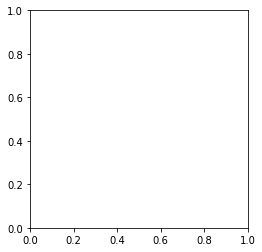

In [72]:
# fig, ax = plt.subplots()


# for x, y in zip(vertices_x, vertices_y):
#     ax.add_patch(plt.Circle((x, y), radii))

# for b in barreras:
#     ax.plot([b[0][0], b[1][0]], [b[0][1], b[1][1]], c = 'red')
    
# ax.set_xlim((0, largo))
# ax.set_ylim((0, alto))
# ax.set_aspect('equal')

Set parameter Threads to value 6
Set parameter TimeLimit to value 3600
Set parameter NumericFocus to value 1
Set parameter NonConvex to value 2
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 6 threads
Optimize a model with 45814 rows, 34316 columns and 95103 nonzeros
Model fingerprint: 0x312b15fd
Model has 1061 quadratic constraints
Variable types: 2197 continuous, 32119 integer (32119 binary)
Coefficient statistics:
  Matrix range     [4e-04, 3e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [6e-04, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e-03, 4e+01]
  QRHS range       [6e-04, 2e+01]
Presolve removed 42977 rows and 32036 columns
Presolve time: 0.46s
Presolved: 2967 rows, 2306 columns, 10126 nonzeros
Presolved model has 285 quadratic constraint(s)
Presolved model has 26 bilinear constraint(s)
Variable types: 1360 continuous, 946 integer (946 bina

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

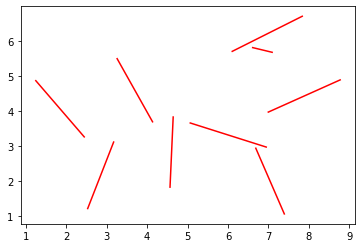

In [73]:
resultados = tspn_b(barreras, Circles, A4 = False, dominant=False, prepro=True, log=False, picture=True, time_limit=3600, init = False)